# Лабораторная работа 3 Моделирование физических процессов описываемых ДУ первого и второго порядка

## Два раза кликните по блоку ниже (ФИО/Группа) и заполните ваше ФИО и номер группы.

ФИО: Черников Святослав Сергеевич

Группа: РИ-221055

## Подключите необходимые библиотеки для лабораторной работы

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline 

## Теория

### Постановка задачи

Природа переноса тепла от нагретого тела в окружающий его воздух весьма сложна и включает в себя механизмы конвекции, излучения, испарения и теплопроводности. Однако при небольшой разности температур между нагретым телом и окружающей средой для описания процесса остывания можно использовать простую модель,
впервые предложенную И. Ньютоном. В данной модели температура холодильника
(окружающей) принимается постоянной, а скорость передачи тепла от нагретого тела к холодильнику пропорциональной разности температур между ними. Это утверждение в математической формулировке записывается на языке дифференциальных
уравнений (ДУ) в следующем виде:

$\frac{dT}{dt}=-r(T-T_s)$,      (2.1)

где $T$ — температура нагретого тела, 
$T_s$ — температура окружающей среды
$r$ — «коэффициент остывания». Значение «коэффициента остывания» зависит от механизма
передачи, площади нагретого тела и тепловых свойств самого тела.

Знак минус в (2.1) появляется во избежание физически ненаблюдаемой ситуации,
когда $T > T_s$. Соотношение (2.1) называется законом теплопроводности Ньютона.
Так как в уравнение (2.1) входит только первая производная неизвестной функции
$T(t)$, его относят к ДУ первого порядка. В связи с тем, что большое количество физических процессов описывается данным классом ДУ, важно научиться находить их
решения. По определению решением ДУ первого порядка, разрешенного относительно производной,

$\frac{dy}{dx} = f(x,y(x))$,       (2.2)

называется дифференцируемая функция $y = \phi(x)$, удовлетворяющая этому уравнению, то есть такая, что
$\phi'(x) ≡ f(x, \phi(x))$ тождественно на некотором участке изменения. Задача нахождения решения уравнения (2.2), удовлетворяющего начальному условию $\phi(x_0) = y_0$, называется задачей Коши.

В общем случае уравнение (2.2) аналитического решения, выражающегося через
элементарные функции, не имеет. Кроме того, даже при наличии аналитического
решения представление его в графическом виде существенно облегчает его анализ. Отмеченные причины являются весьма важным аргументом в пользу нахождения приближенных численных решений ДУ.


### Алгоритм Эйлера

При численном решении вместо исходного ДУ ищется решение конечно-разностного ДУ. Переход к конечно-разностному уравнению от уравнения (2.2) осуществляется следующим образом. Вместо точного значения производной рассматривают ее
разностный аналог:

$\frac{dy}{dx} \rightarrow \frac{y(x + \Delta x) - y(x)}{\Delta x}$,            (2.3)

где $\delta x$ — достаточно малая величина. Тогда в конечных разностях уравнение (2.2) принимает следующий вид: 

$\frac{y(x + \Delta x) − y(x)}{\Delta x} = f(x,y(x))$.              (2.4)

Из (2.4) сразу получаем формулу для нахождения значения функции $y = y(x)$ в
точке $x + \Delta x$:

$y(x + \Delta x) = y(x) + \Delta x f(x, y(x))$.             (2.5)

Из (2.5) видно, как построить алгоритм для решения задачи Коши:

1. Задать начальные условия $(x_0, y_0)$.


2. Вычислить в точке $x_1 = x_0 + \Delta x$ значение функции $y = y(x)$, определяемое
выражением (2.5): $y_1 = y_0 + \Delta x f(x_0, y_0)$. (2.6)


3. Повторить процедуру, описанную в п. 2, и найти значение функции $y = y(x)$ в
точке $x_2 = x_1 + \Delta x$ и так далее для всех значений переменной $x_n = x_0 + i \Delta x$.

Наиболее удобно записать данный алгоритм в виде следующей итерационной формулы:
$y_i = y_{i−1} + \Delta x f(x_{i−1}, y(x_{i−1})), i = 1, 2, ...$. (2.7)

Величина шага $\Delta$ зависит от конкретной задачи.

Значение в n-й точке оценивается по значению функции и ее производной в $n − 1$-й точке, при этом принимается, что значение производной (то есть угол наклона касательной) на отрезке $[x_{i−1}; x_i]$ остается неизменным. Невыполнение данного условия приводит к отклонению численного решения от точного решения. Данное отклонение может быть уменьшено уменьшением $\Delta x$.


### Решение ДУ первого порядка

Приступая к разработке программы вне зависимости от использованного языка
программирования, необходимо разбить всю задачу на последовательность независимых заданий, соответствующих алгоритму, описанному в предыдущем разделе. Программа должна состоять из следующих блоков:

1. Задание начальных условий.
   
2. Задание функции $f(x, y(x))$.

3. Задание отрезка, на котором ищется решение, и шага интегрирования. (Отметим, что на практике оказывается более удобным задавать не шаг интегрирования, а количество интервалов, на которые разбивается отрезок интегрирования,
а затем вычислять значение шага.)

4. Вычисление координат точек, в которых ищется решение дифференциального
уравнения.

5. Решение уравнения (2.2) методом Эйлера.

6. Вывод результатов.

## Решение задачи Коши для ДУ методом Эйлера:

$y'= −y^2 + x$ с начальным условием $y(0) = 1$.

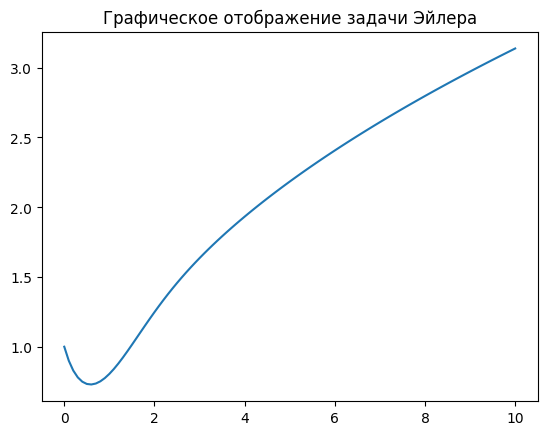

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(x:float, y:float) -> float:
    """
    f(x,y) - функция, стоящая в правой части ДУ

    Args:
        x (float): координата x
        y (float): координата y
    """
    return x - y ** 2

def Euler(y0:float = 0, 
          x0:float = 1, 
          x1:float = 10, 
          N : int = 100):
    """
    Функция, возвращающая численные решения ДУ
    первого порядка методом Эйлера

    Args:
        y0 (float): начальный y
        x0 (float): начальный x
        x1 (float): правая граница отрезка
        N (int): число узлов координатной сетки
    """
    # Вычисление шага интеграции
    dx = (x1-x0)/N
    
    # Задать начальные условия
    x = []
    y = []
    x.append(x0)
    y.append(y0)
    
    # Реализация вычислительной схемы Эйлера
    for i in range(N):
        x.append (x[i] + dx)
        y.append (y[i] + dx * f(x[i],y[i]))
    return x, y


x0 = 0
y0 = 1
x1 = 10
N = 100

x,y = Euler(y0, x0, x1, N)
plt.title("Графическое отображение задачи Эйлера")
plt.plot(x,y)

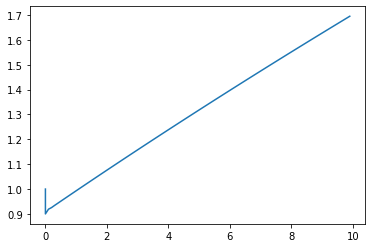

## Моделирование радиоактивного распада

Ядерный распад зависит только от внутренних свойств данного типа атомного ядра. Особенность атомных ядер состоит в том, что они могут распадаться. Вероятность распада описывается выражением:

$\lambda = \frac{1}{N} \frac{dN}{dt}$ , (2.38)

$\frac{dN}{dt} = -\lambda N$

где $N(t)$ — количество ядер в образце в момент времени $t$, $\lambda$ — константа экспоненциального затухания, $dN$ — количество ядер в образце в момент времени $dt$:

 $dN = N(t) − N(t + dt)$. (2.39)

Тогда скорость распада определяется как

$\frac{dN}{dt} = −\lambda N$. (2.40)

Уравнение (2.38) называется уравнением распада. Оно является ДУ первого порядка с разделяющимися переменными, которое может быть легко проинтегрировано. Его решение имеет следующий вид:

$N(t) = N_0 e^{−\lambda t}$, (2.41)

где $N_0$ — число ядер в момент времени $t = 0$.

### Реализовать функцию вероятности радиоактивного распада $\frac{dN}{dt} = -\lambda N$


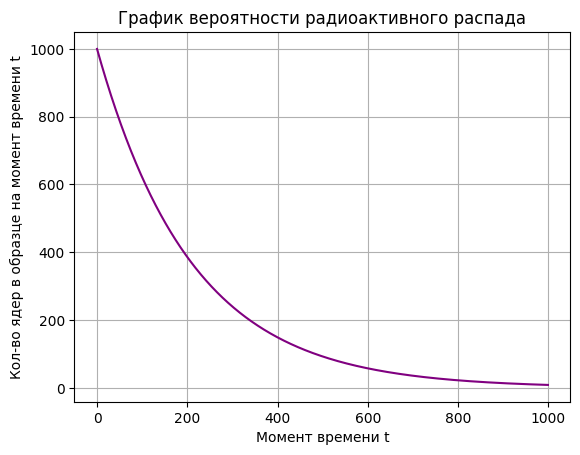

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import odeint

def function_of_radiocactive_decay(N, t):
  return -lamda*N

N0 = 1000
half_of_decay = 3.5*60 # Период полураспада
lamda = 1/ half_of_decay
t = np.arange(0, 1000, 1)

N = odeint(function_of_radiocactive_decay, N0, t) # Решаем дифференциальное уравнение




plt.plot(t, N, color='purple')
plt.title('График вероятности радиоактивного распада')
plt.xlabel("Момент времени t")
plt.ylabel("Кол-во ядер в образце на момент времени t")
plt.grid()
plt.show()


### Реализовать модель радиоактивного распада для раных $\lambda$ от 0.1 до 1 с шагом 0.1

Построить графики для этих моделей в отдельным окне

Можно использовать решатели дифференциальных уравнений Python [scipy.integrate](https://docs.scipy.org/doc/scipy/reference/integrate.html)

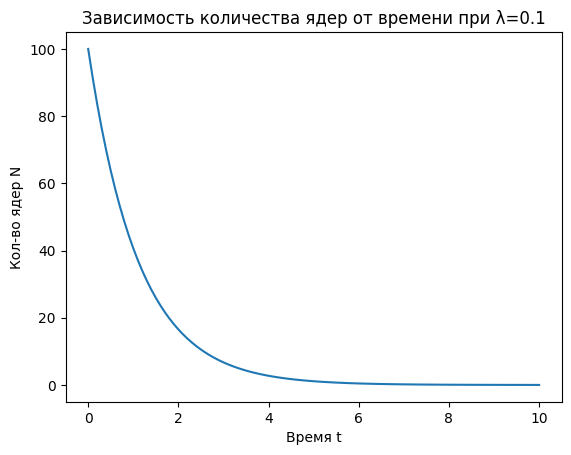

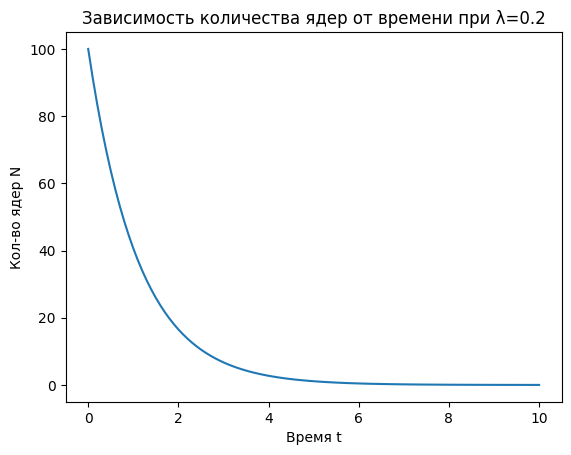

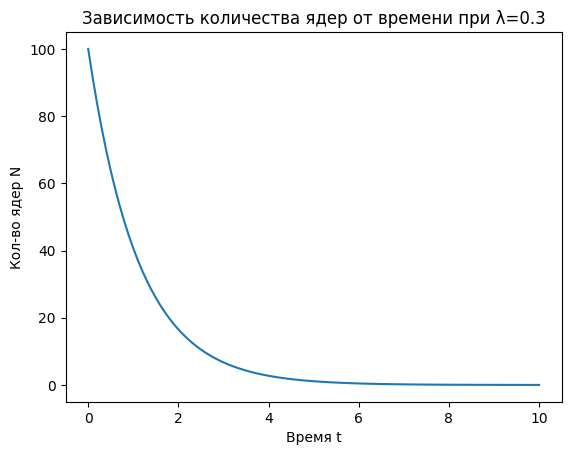

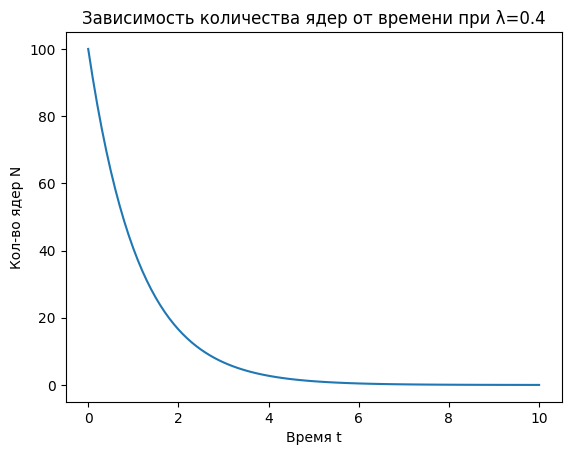

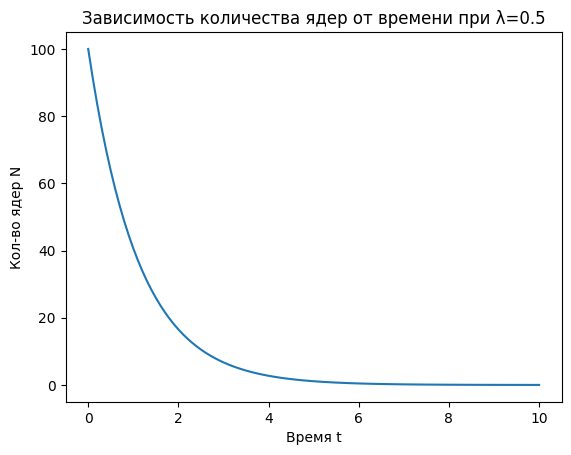

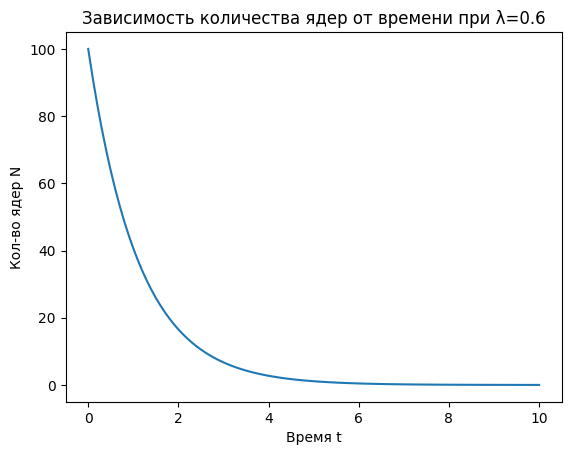

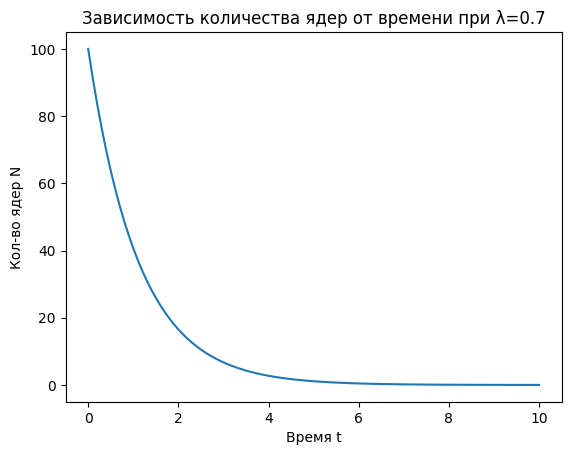

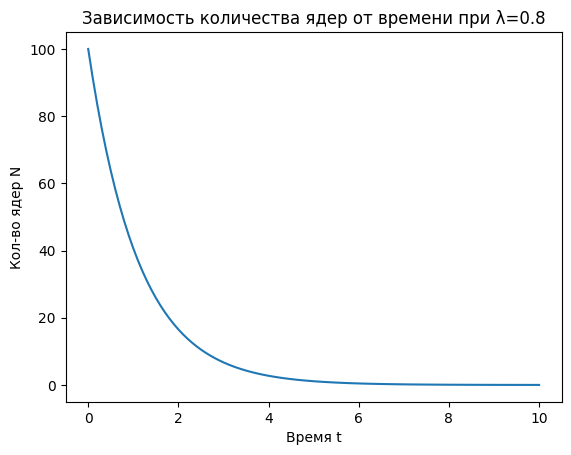

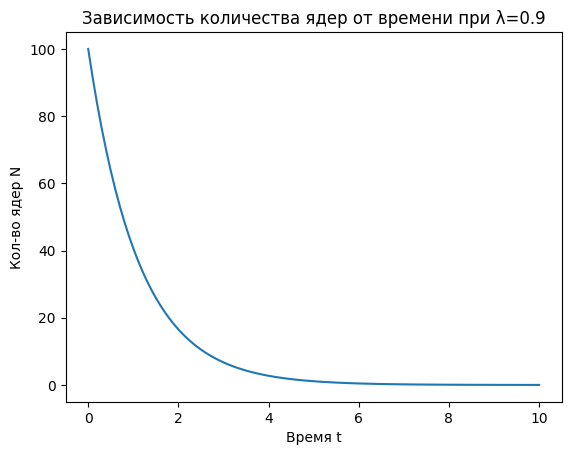

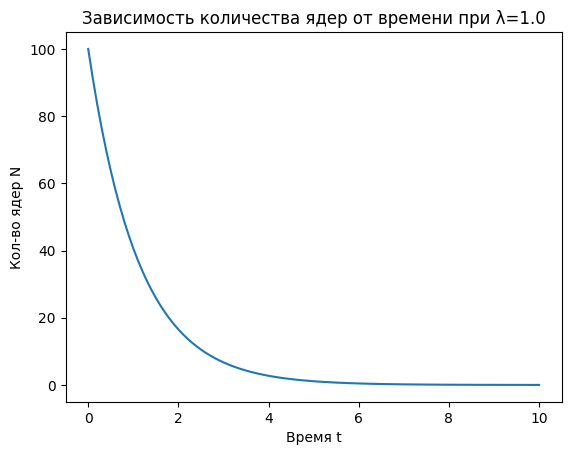

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

N0 = 100
t0 = 0
tn = 10
half_of_decay = 3.5*60 # Период полураспада

def f(t,N):
    return -l*N

for decay_lambda in np.arange(0.1,1.1,0.1):

    sol = solve_ivp(f, [t0,tn], [N0], max_step = 0.1)

    cores = sol.y[0]
    time = sol.t

    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1,1,1)
    ax1.plot(time,cores)
    plt.xlabel('Время t')
    plt.ylabel('Кол-во ядер N')
    plt.title(f'Зависимость количества ядер от времени при λ={round(decay_lambda,1)}')

## Моделирование динамики материальной точки

Большинство задач, связанных с определением закона движения тела вблизи земной поверхности, имеют известные аналитические решения. Несмотря на это, мы считаем полезным вновь вернуться к этим задачам и получить их решения с помощью
ПК, поскольку здесь можно продемонстрировать наиболее общие приемы и подходы
к решению физических задач на ПК.

Отметим, что при решении данных задач используется простейшая модель, в которой не учитываются возможные вращения и внутренние движения тела, то есть
реальное физическое тело заменяется идеализированным объектом, не обладающим
внутренней структурой, — материальной точкой. Задача описания закона движения
материальной точки традиционно рассматривается в кинематике, где движение материальной точки рассматривается безотносительно причины ее вызывающей, и динамике, где рассматриваются силы, действующие на тело. В соответствии со вторым законом Ньютона ускорение $\vec{a}$, с которым движется тело, прямо пропорционально действующей на него силе $\vec{F}$ (а если сил, приложенных к материальной точке, несколько,
то их равнодействующей, то есть векторной сумме сил) и обратно пропорционально
его массе $m$:

$\vec{a} = \frac{\vec{F}}{m}$

В общем случае сила $\vec{F}(t)$ зависит от положения точки, характеризуемого радиусом-вектором $\vec{F}(t)$, скорости $\vec{v}(t)$ и времени:

$\vec{F}(t) = \vec{F}(t, \vec{r}, \vec{v})$.

Тот факт, что силы, действующие на тело, не зависят от производных скорости,
является свойством природы, но не следствием математического описания. Это свойство позволяет найти простые объяснения для многих наблюдаемых на практике движений. Так как по определению

$\vec{a} = \frac{d\vec{v}}{dt} = \frac{d^2\vec{r}}{dt^2}$

то зависимость скорости от времени описывается уравнением

$\frac{d\vec{v}}{dt} = \frac{\vec{F}}{m}$ (3.2)

а зависимость координаты от времени —

$\frac{d^2\vec{r}}{dt^2} = \frac{\vec{F}}{m}$ (3.3)

поэтому для описания движения материальной точки необходимо решить ДУ второго
порядка относительно координаты (3.3), которое для тела с постоянной массой эквивалентно системе ДУ первого порядка

$\vec{v}(t) = \frac{d}{dt}\vec{r}$ и $\vec{a}(t) = \frac{d}{dt}\vec{v}$ (3.4)

Для описания движения тела с переменной массой $m(t)$ необходимо решать уравнение движения, в которых масса является функцией времени:

$\frac{d\vec{p}}{dt} = \frac{d}{dt}[m(t)\vec{v}(t)] = \frac{dm(t)}{dt} \vec{v}(t) + m(t)\frac{d\vec{v}(t)}{dt} = \vec{F}(t)$

называемое уравнением Мещерского

### Движение тел в гравитационном поле без учета трения

Рассмотрим задачу об одномерном движении материальной точки с постоянной
массой в гравитационном поле Земли. В соответствии с законом всемирного тяготения сила, действующая на тело массы $m$, равна

$F = \frac{\gamma Mm}{(R+y)^2} = \frac{gm}{(1 + y\R)^2}$, (3.5)

где $y$ — расстояние от поверхности Земли, $R$ — радиус Земли, $g$ — гравитационная
постоянная, $M$ — масса Земли, $g = \gamma M/R^2$. При этом на первом шаге будем считать силу тяжести постоянной, что справедливо, как видно из (3.5), для случая, когда
$y/R ≪ 1$.

Выберем систему отсчета с положительным направлением координатной оси вверх. Подставляя (3.5) в (3.3), получаем уравнение движения в выбранной системе отсчета

$\frac{d^2 y}{dt^2} = -g$. (3.6)

Данное уравнение является ДУ второго порядка, для которого задача Коши ставится заданием начальных условий: значений координаты $y(0) = y_0$ и скорости $v(0) = y'(0) = v_0$. Аналитический ответ может быть получен последовательным интегрированием (3.6):

$v(t) = v_0 − g t$, (3.7)

$y(t) = y_0 + v_0t + 0.5gt^2$. (3.8)

Поскольку большинство решателей работают с системами ОДУ, приведенными к форме Коши, необходимо привести системе ОДУ второго порядка к системе
обыкновенных дифференциальных уравнений первого порядка, введя новую переменную

$\frac{dy}{dt} = z$. (3.9)

Тогда уравнение (3.6) принимает следующий вид:

$\frac{dz}{dt} = −g$. (3.10)

Уравнения (3.9), (3.10), образующие систему ОДУ первого порядка, как очевидно,
можно записать в матричном виде

$\frac{d}{dt} \left ( \begin{matrix}
y\\
z
\end{matrix} \right )  = \left ( \begin{matrix}
z\\
-g
\end{matrix} \right )$. (3.11)

Запись системы в виде (3.11) позволяет создать m-файл, содержащий описание
вектора-функции, стоящей в правой части (3.11):


#### Реализация задачи с начальными условиями $y(0)=10$, $y'(0)=1$ для $t$ от 0 до 1.5 с шагом 0.01

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.000e-02 ...  1.490e+00  1.500e+00]
        y: [[ 1.000e+01  1.001e+01 ...  6.115e-01  4.750e-01]
            [ 1.000e+00  9.020e-01 ... -1.360e+01 -1.370e+01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 902
     njev: 0
      nlu: 0


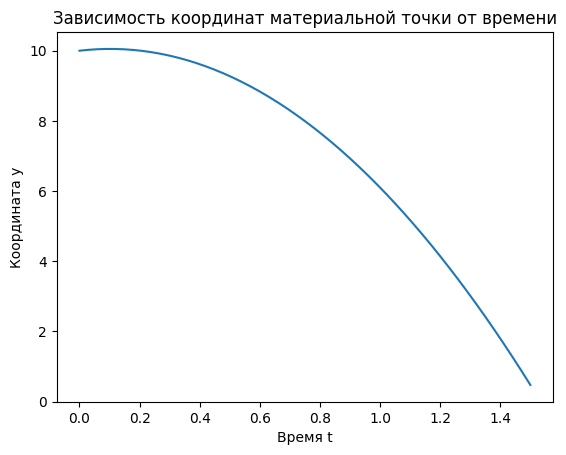

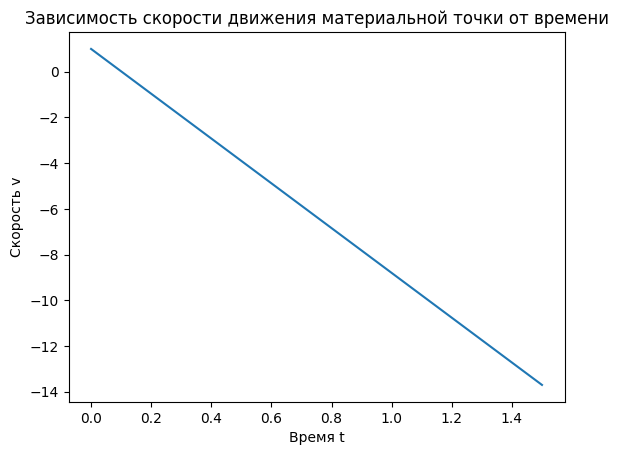

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.8 
y0 = 10
dy0 = 1 
t0 = 0
tn = 1.5

def f(t,r):
    y, z = r
    return [z, -g]

sol = solve_ivp(f, [t0,tn], [y0,dy0], max_step = 0.01)

print(sol)

def DrawGraphic():
    coordinate = sol.y[0]
    speed = sol.y[1]
    time = sol.t

    fig1 = plt.figure()
    ax1 = fig1.add_subplot(1,1,1)
    ax1.plot(time,coordinate)
    plt.xlabel('Время t')
    plt.ylabel('Координата y')
    plt.title('Зависимость координат материальной точки от времени')

    fig2 = plt.figure()
    ax2 = fig2.add_subplot(1,1,1)
    ax2.plot(time,speed)
    plt.xlabel('Время t')
    plt.ylabel('Скорость v')
    plt.title('Зависимость скорости движения материальной точки от времени')




if sol.success:
    DrawGraphic()


### Движение тел в гравитационном поле с учетом силы трения

Ранее мы рассмотрели движение тел в гравитационном поле
Земли без учета сил сопротивления, действующих на тело со стороны среды, через
которую оно движется. При движении реальных тел в газовой или жидкой средах,
как показывают результаты экспериментов, сила трения является главным фактором,
который определяет характер движения тела.
О силе сопротивления, действующей на движущееся в среде тело, известно, что
она (за исключением некоторых отдельных случаев) увеличивается с ростом скорости.
Наиболее общими зависимостями силы сопротивления от скорости являются

$F_d(v) = k_1v$, (3.15)

$Fd(v) = k_2v^2$. (3.16)

где параметры $k_1$, $k_2$ зависят от свойств среды и геометрии тела.
Особо отметим, что зависимости (3.15), (3.16) не являются точными законами физики, но представляют собой феноменологические выражения, приближенно описывающие функцию Fd(v) в некоторых диапазонах скоростей.
При относительно малых скоростях сила сопротивления описывается выражением (3.15). Для тел, имеющих относительно простую форму, известны аналитические
выражения коэффициентов k1. Например, для шарика радиуса r коэффициент сопротивления задается формулой Стокса:

$k_1 = 6\pi \mu r$, (3.17)

где $\mu$ — динамическая вязкость среды.

Числовые значения плотности и динамической вязкости различных сред при
$t = 20$ $C^{\circ}$ и давлении 1 атм представлены в таблице.

|       | Вода   | Воздух | Глицерин |
|-------|--------|--------|----------|
| $\rho$, $кг/m^3$ | 1.29   | 1000   | 1290     |
| $\mu$, $ (Н · с)/м^2 $ | 0.0182 | 1.002  | 1480     |

Представляет практический интерес оценить величину предельной скорости v1 движения шара, падающего вертикально, то есть скорости движения, при которой сила тяжести будет равна силе трения:

$6\pi \mu r v_1 = mg$, (3.18)

откуда

$v_1 = \frac{mg}{6\pi \mu r}  = \frac{4/3 \pi r^3 \rho g}{6 \pi \mu r} = \frac{2r^2  \rho g}{9 \mu}$, (3.19)

где $\rho$ — плотность тела.

Значения предельной скорости $v_1$ для шара радиусом $r = 0, 1$ м, $\rho$ = 0,8·103 кг/м3 (дерево) представлены в таблице

|       | Вода   | Воздух | Глицерин |
|-------|--------|--------|----------|
| $v$, м/с | 960   | 17   | 0.012     |

При больших скоростях сила сопротивления описывается выражением (3.16). Из
экспериментов о величине $k_2$ известно, что она пропорциональна площади поперечного к потоку сечения тела $S$, плотности среды $\rho$ и зависит от формы тела. Данную
зависимость принято выражать следующей формулой:

$k_2 = \frac{1}{2} cS \rho_0$, (3.20)

где $c$ — безразмерный коэффициент (коэффициент формы), характеризующий лобовое сопротивление, $\rho$ — плотность среды. 

Проведем аналогичные оценки предельной скорости $v_2$ для квадратичного закона
сопротивления. Приравнивая силу сопротивления и силу тяжести, имеем

$cS \frac{\rho_0}{2} v^2_2=mg$, (3.21)

откуда

$v_2 = \sqrt{\frac{2mg}{\rho}}$ (3.22)

или

$v2 = \sqrt{\frac{2\rho · 4/3 \pi r^3 g}{c\pi r^2 \rho_0}}$. (3.23) 

Значения предельной скорости $v_2$ для шара радиусом $r = 0,1$ м, $\rho = 0,8·103 кг/м^3$ (дерево) представлены в таблице

|       | Вода   | Воздух | Глицерин |
|-------|--------|--------|----------|
| $v$, м/с | 0.65   | 18   | 0.58     |

Для дальнейшего анализа особенностей движения тел в гравитационном поле Земли при наличии силы сопротивления удобно измерять скорость движения в единицах
установившейся скорости $v_1$, $v_2$. В выбранных единицах измерения выражения (3.15), (3.16) принимают следующий вид:

$Fd = k_1v_1(\frac{v}{v_1})= mg(\frac{v}{v_1})$, (3.24)

$Fd = k_2v_2(\frac{v}{v_2})^2= mg(\frac{v}{v_2})^2$, (3.25)

Рассмотрим падение тела вертикально вниз с нулевой начальной скоростью при
наличии силы сопротивления. Так как сила сопротивления зависит от скорости, при
аналитическом решении данной задачи удобно использовать уравнение движения в
форме (3.2):

$\frac{dv}{dt} = − \frac{mg - F_d}{m} = − \frac{mg - mg(\frac{v}{v_1}) - mg(\frac{v}{v_2})^2 }{m} = −g (1 - \frac{v}{v_1} - (\frac{v}{v_2})^2)$, (3.26)

которое, как очевидно, является ОДУ с разделяющимися переменными и может
быть легко проинтегрировано аналитически. Повторным интегрированием зависимости $v = v(t)$ находят зависимость координаты материальной точки от скорости. Дополнив уравнение (3.26) уравнением

$\frac{dx}{dt} = v$, (3.27)

получаем систему дифференциальных уравнений, которую можно решить в численно.

#### Смоделировать задачу

Для значений предельной скорости, представленных в таблицах 1 и 2,
решите уравнение движения (3.26) и постройте зависимости $x = x(t)$,
$y = y(t)$, $v = v(y)$.

Таблица 1
|       | Вода   | Воздух | Глицерин |
|-------|--------|--------|----------|
| $v$, м/с | 960   | 17   | 0.012     |

Таблица 2
|       | Вода   | Воздух | Глицерин |
|-------|--------|--------|----------|
| $v$, м/с | 0.65   | 18   | 0.58     |



Text(0, 0.5, 'Название')

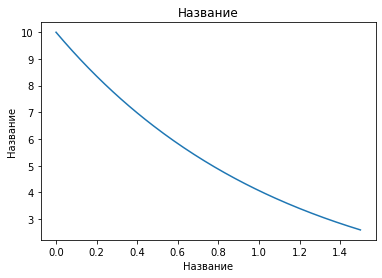

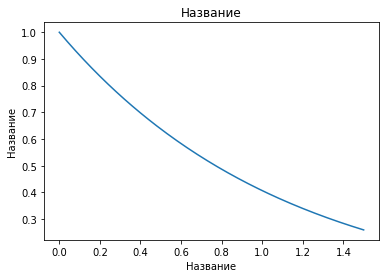

In [97]:
# код

## Выводы по работе

Выводы